## Data Cleaning
Program to clean and organize raw data from imported Excel sheet.

In [20]:
# Preparation
import pandas as pd
import missingno as miss

In [21]:
# Import the Excel sheet
dta = pd.read_excel('data/Data_Sheet_1.xlsx',
                   header=[0])
# Preview the first ten rows Excel sheet
dta.head(10)

,No.,Participant,Category,Age,Unnamed: 4,Education,Unnamed: 6,Sex,Marital Status,Income,...,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78
0,NaN,NaN,NaN,Years,Category,Years,Category,NaN,NaN,NaN,...,Vegetable,Vege Category,Fruit,Fruit Category,Salted Fish,Salted Fish Category,Instant Noodle,Int.Noodle Category,Tempe,Tempe Category
1,1.0,80001.0,Dementia,70,60-74,3,0-6 years,Female,Married,No Income,...,2 times/day,Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent
2,2.0,80002.0,Normal,63,60-74,0,0-6 years,Female,Single,< monthly minimum wage,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent
3,3.0,80003.0,Normal,64,60-74,6,0-6 years,Female,Married,No Income,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,NaN,NaN,NaN,NaN
4,4.0,80004.0,Normal,62,60-74,6,0-6 years,Female,Married,≥ monthly minimum wage,...,2 times/day,Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Few times/week,Frequent,Few times/week,Non-Frequent
5,5.0,80005.0,Dementia,78,>75,3,0-6 years,Female,Married,No Income,...,2 times/day,Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent
6,6.0,80006.0,Dementia,78,>75,0,0-6 years,Female,Married,No Income,...,3-4 times/week,Non Frequent,1 time/day,Frequent,Few times/week,Frequent,Every Meal,Frequent,Few times/week,Non-Frequent
7,7.0,80007.0,Normal,75,>75,6,0-6 years,Female,Single,No Income,...,3-4 times/week,Non Frequent,3-4 times/week,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent
8,8.0,80009.0,Normal,64,60-74,4,0-6 years,Female,Married,No Income,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,NaN,NaN,NaN,NaN
9,9.0,80010.0,Dementia,66,60-74,2,0-6 years,Female,Single,No Income,...,3-4 times/week,Non Frequent,3-4 times/week,Non Frequent,Sometimes,Non-Frequent,NaN,NaN,NaN,NaN


Notes: Because some variables had sub-categories (resulting in the first 2 rows of the Excel sheet referring to column names), some adjustments to the data set column names need to be made.

### Make adjustments to variables names, column structures

In [22]:
len(dta.columns)

79

In [23]:
dta.columns = ['No.', 'Participant_ID', 'Category', 'Age_yrs', 'Age_category', 'Education_yrs', 
               'Education_category', 'Sex', 'Marital_status', 'Income', 'Occupation_class',
               'Living_area', 'BP_sistol', 'BP_diastol', 'BMI', 'GDS', 'Glucose', 
               'Triglyceride', 'HDL', 'Hypertension', 'BMI_category', 'Diabetes', 'Tri_200', 
               'HDL_40', 'Smoking_status', 'Stroke', 'Depression', 'INA-AD8', 'ADL', 'AMT', 
               'Intelectual_1', 'Intelectual_2', 'Intelectual_3', 'Intelectual_4', 
               'Intelectual_5', 'Intelectual_6', 'Intelectual_7', 'Intelectual_8', 'Social_1', 
               'Social_2', 'Social_3', 'Social_4', 'Social_5', 'Social_6', 'Social_7', 
               'Social_8', 'Social_9', 'Recreational_1', 'Recreational_2', 'Recreational_3',
               'Recreational_4', 'Recreational_5', 'Recreational_6', 'Recreational_7', 
               'Recreational_8', 'Physical_1', 'Physical_2', 'Physical_3', 'Physical_4', 
               'Physical_5', 'Intellectually_active', 'Socially_active', 
               'Recreationally_active', 'Physically_active', 'Total_active', 'Carbohydrate',
               'Carbo_category', 'Protein', 'Protein_category', 'Vegetable', 
               'Vegetable_category', 'Fruit', 'Fruit_category', 'Salted_fish', 
               'Salted_fish_category', 'Instant_noodle', 'Instant_noodle_category', 'Tempe',
               'Tempe_category']

In [24]:
# Verify successfull renaming of columns
dta.head(10)

,No.,Participant_ID,Category,Age_yrs,Age_category,Education_yrs,Education_category,Sex,Marital_status,Income,...,Vegetable,Vegetable_category,Fruit,Fruit_category,Salted_fish,Salted_fish_category,Instant_noodle,Instant_noodle_category,Tempe,Tempe_category
0,NaN,NaN,NaN,Years,Category,Years,Category,NaN,NaN,NaN,...,Vegetable,Vege Category,Fruit,Fruit Category,Salted Fish,Salted Fish Category,Instant Noodle,Int.Noodle Category,Tempe,Tempe Category
1,1.0,80001.0,Dementia,70,60-74,3,0-6 years,Female,Married,No Income,...,2 times/day,Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent
2,2.0,80002.0,Normal,63,60-74,0,0-6 years,Female,Single,< monthly minimum wage,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent
3,3.0,80003.0,Normal,64,60-74,6,0-6 years,Female,Married,No Income,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,NaN,NaN,NaN,NaN
4,4.0,80004.0,Normal,62,60-74,6,0-6 years,Female,Married,≥ monthly minimum wage,...,2 times/day,Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Few times/week,Frequent,Few times/week,Non-Frequent
5,5.0,80005.0,Dementia,78,>75,3,0-6 years,Female,Married,No Income,...,2 times/day,Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent
6,6.0,80006.0,Dementia,78,>75,0,0-6 years,Female,Married,No Income,...,3-4 times/week,Non Frequent,1 time/day,Frequent,Few times/week,Frequent,Every Meal,Frequent,Few times/week,Non-Frequent
7,7.0,80007.0,Normal,75,>75,6,0-6 years,Female,Single,No Income,...,3-4 times/week,Non Frequent,3-4 times/week,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent
8,8.0,80009.0,Normal,64,60-74,4,0-6 years,Female,Married,No Income,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,NaN,NaN,NaN,NaN
9,9.0,80010.0,Dementia,66,60-74,2,0-6 years,Female,Single,No Income,...,3-4 times/week,Non Frequent,3-4 times/week,Non Frequent,Sometimes,Non-Frequent,NaN,NaN,NaN,NaN


In [25]:
# Drop first column - it's matches index
dta = dta.drop(columns=['No.'])

# Drop first row - it's just a duplicate of variable names
dta = dta.drop([0])

# Edit data types
dta = dta.astype({'Participant_ID': int})

In [26]:
# Verify above changes
dta.head(10)

,Participant_ID,Category,Age_yrs,Age_category,Education_yrs,Education_category,Sex,Marital_status,Income,Occupation_class,...,Vegetable,Vegetable_category,Fruit,Fruit_category,Salted_fish,Salted_fish_category,Instant_noodle,Instant_noodle_category,Tempe,Tempe_category
1,80001,Dementia,70,60-74,3,0-6 years,Female,Married,No Income,housewife,...,2 times/day,Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent
2,80002,Normal,63,60-74,0,0-6 years,Female,Single,< monthly minimum wage,profesional,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent
3,80003,Normal,64,60-74,6,0-6 years,Female,Married,No Income,housewife,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,NaN,NaN,NaN,NaN
4,80004,Normal,62,60-74,6,0-6 years,Female,Married,≥ monthly minimum wage,housewife,...,2 times/day,Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Few times/week,Frequent,Few times/week,Non-Frequent
5,80005,Dementia,78,>75,3,0-6 years,Female,Married,No Income,housewife,...,2 times/day,Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent
6,80006,Dementia,78,>75,0,0-6 years,Female,Married,No Income,housewife,...,3-4 times/week,Non Frequent,1 time/day,Frequent,Few times/week,Frequent,Every Meal,Frequent,Few times/week,Non-Frequent
7,80007,Normal,75,>75,6,0-6 years,Female,Single,No Income,housewife,...,3-4 times/week,Non Frequent,3-4 times/week,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent
8,80009,Normal,64,60-74,4,0-6 years,Female,Married,No Income,housewife,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,NaN,NaN,NaN,NaN
9,80010,Dementia,66,60-74,2,0-6 years,Female,Single,No Income,notworking,...,3-4 times/week,Non Frequent,3-4 times/week,Non Frequent,Sometimes,Non-Frequent,NaN,NaN,NaN,NaN
10,80011,Dementia,73,60-74,0,0-6 years,Female,Single,No Income,housewife,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Few times/week,Frequent,Few times/week,Non-Frequent


### Explore missingness in the data

<AxesSubplot:>

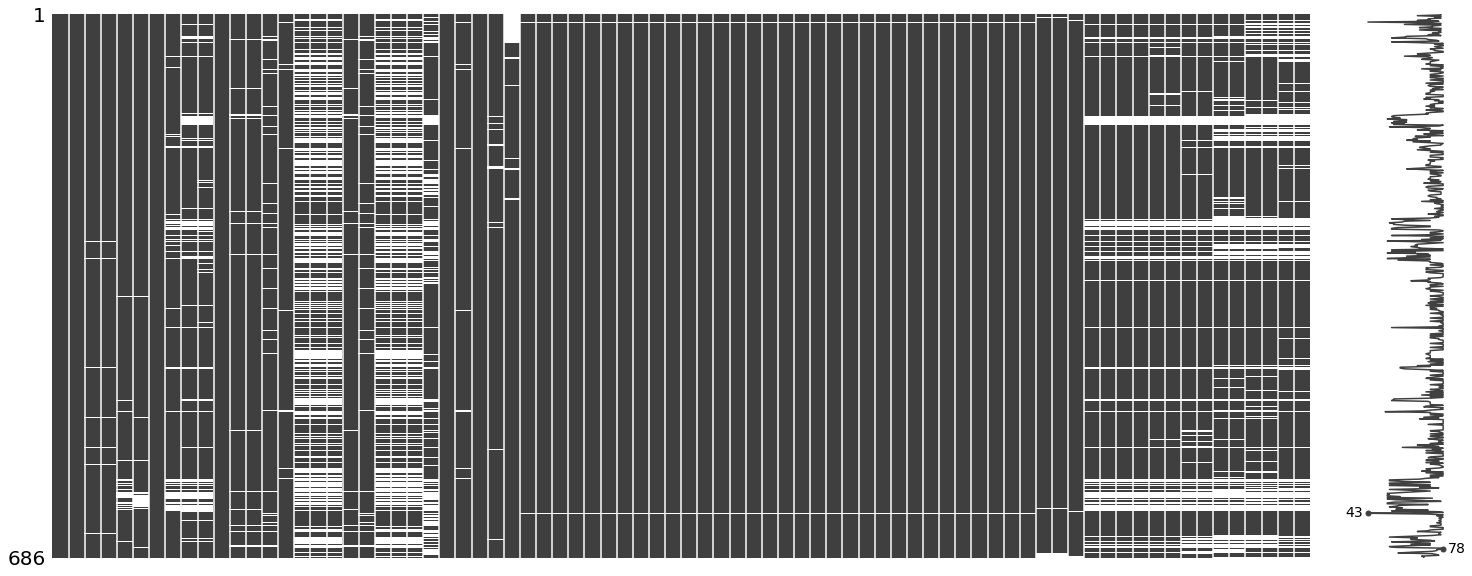

In [27]:
miss.matrix(dta)

In [28]:
def missing_zero_values_table(df):
    '''
    This function creates a table of each variable's counts of zero values and missing values.
    It reports the counts as percentages of all observations in a column as well.
    
    Arguments
    ---------
    dataframe: pandas dataframe
    
    Returns
    -------
    table: table of information on each variable's missingness
    '''
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum() 
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
    mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
    mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("This dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
        "There are " + str(mz_table.shape[0]) +
        " columns that have missing values.")
    return mz_table

missing_dta = missing_zero_values_table(dta)
missing_dta.head(10)

This dataframe has 78 columns and 686 Rows.
There are 72 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Tri_200,0,295,43.0,295,43.0,object
HDL_40,0,295,43.0,295,43.0,object
Diabetes,0,295,43.0,295,43.0,object
HDL,0,295,43.0,295,43.0,object
Triglyceride,0,295,43.0,295,43.0,object
Glucose,0,295,43.0,295,43.0,object
Smoking_status,0,180,26.2,180,26.2,object
Instant_noodle,0,163,23.8,163,23.8,object
Instant_noodle_category,0,163,23.8,163,23.8,object
Tempe,0,156,22.7,156,22.7,object


Notes: The columns with the most missing values tend to be lab-based biomarkers. This could indicate that some patients hadn't gotten certain tests or lab work done that other patients have. Additionally, there's missingness in the diet section of the dataset, which may mean patients didn't properly document their food intake or don't eat a certain food category at all.